# Perceptron Implementation

The Perceptron is a supervised learning algorithm for binary classification, that is, separating two classes of data linearly. The intuition behind the Perceptron is based on replicating the functioning of a neuron in the human brain. It takes several inputs, weights them, sums them, and then applies an activation function to produce a binary output (0 or 1). If the sum of the weighted inputs exceeds a certain threshold, the neuron is activated (produces a 1); otherwise it is not activated (produces a 0). The key to the Perceptron is to adjust the weights of the inputs to minimize errors in classification.

## Perceptron algorithm pseudocode:

Start random or zero weights and threshold
For each training example (x, y):
     Calculate the output of the Perceptron:
     output = activation_function(sum(w * x) + threshold)
     Update weights and threshold:
     w = w + alpha * (y - y_hat) * x
     b = b + alpha * (y - y_hat)
     threshold = threshold + delta_threshold

## Implementation of the Perceptron Algorithm in Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, max_epochs=100):
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, x):
        return 1 if np.dot(self.weights, x) + self.bias > 0 else -1

    def train(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for i in range(X.shape[0]):
                x = X[i]
                y_pred = self.predict(x)
                if y[i] * y_pred <= 0:
                    errors += 1
                    self.weights += self.learning_rate * y[i] * x
                    self.bias += self.learning_rate * y[i]
            if errors == 0:
                break

In [3]:
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

perceptron = Perceptron(num_features=2, learning_rate=0.1, max_epochs=100)
perceptron.train(X, y)

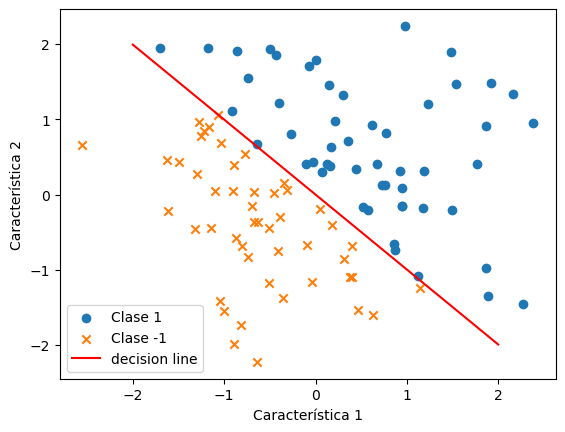

In [4]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Clase 1', marker='o')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Clase -1', marker='x')

x_line = np.linspace(-2, 2, 100)
y_line = -(perceptron.weights[0] * x_line + perceptron.bias) / perceptron.weights[1]

plt.plot(x_line, y_line, label='decision line', color='red')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

## Loss function and optimization function:

The Perceptron does not use a specific loss function like more complex neural networks. It employs a simple loss function based on classification errors. The loss function would be the difference between the true label and the predicted label. Optimization is done by adjusting the weights and bias during training, using the learning rate to control the magnitude of the adjustments.